In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py
from numba import njit

In [28]:
@njit
def chebyshev_polynomials(x, M):

  return np.cos(M*np.arccos(x))

@njit
def kernal(n, N):

  a = (N - n + 1)*np.cos(n*np.pi/(N + 1))
  b = np.sin(n*np.pi/(N + 1))/np.tan(np.pi/(N + 1))
  k = 1/(N+1)*(a + b)

  return k

@njit
def dos(all_moments, N): # moments > 1

  dos = np.zeros(20000)
  energy = np.linspace(-1 + 0.01, 1 - 0.01, 20000)

  sqrt = 1/(np.pi*np.sqrt(1 - energy**2))
  dos += chebyshev_polynomials(energy, 0)*kernal(0, N)*all_moments[0]

  for i in range (N - 1):
    dos += 2*chebyshev_polynomials(energy, i + 1)*kernal(i + 1, N)*all_moments[i + 1]

  return energy, sqrt*dos

In [33]:
mTest = np.loadtxt("../Data/moments_DOS.dat")[:, 0]

In [34]:
ETest, dTest = dos(mTest, 512)

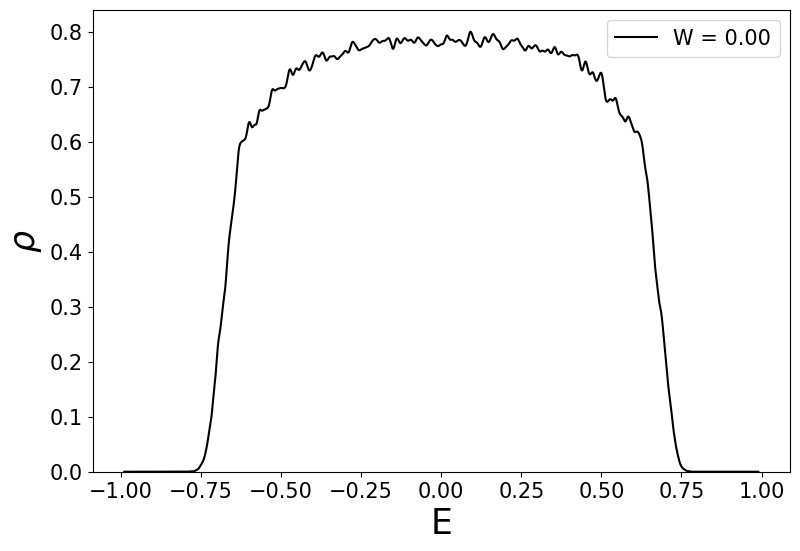

In [35]:
plt.figure(figsize=(9, 6))

plt.plot(ETest, dTest, label="W = 0.00", c='black')
#plt.plot(6.1*ETest1, dTest1/6.1, label="W = 0.00 Complex")

#plt.xlim(left=-7, right=7)

plt.xlabel("E", fontsize=25)
plt.ylabel(r"$\rho$", fontsize=25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim(ymin=0)
plt.legend(fontsize=15)
plt.show()